In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,TimeStamp,Facility,Occupied,Address,Vacant,TotalAvailable
0,8/23/2021 8:42,Central Parking Facility Upper Level,62,"75 E Chicago Av, Naperville IL",117,179
1,8/23/2021 8:42,Central Parking Facility Lower Level,105,"75 E Chicago Av, Naperville IL",61,166
2,8/23/2021 8:42,Central Parking Facility Mid Level,80,"75 E Chicago Av, Naperville IL",71,151
3,8/23/2021 8:42,Van Buren Parking Facility,300,"43 W Van Buren Av, Naperville IL",492,792
4,8/23/2021 8:42,Water Street Parking Facility,249,"120 Water St, Naperville IL",151,400
...,...,...,...,...,...,...
827370,7/20/2010 7:24,Van Buren Parking Facility,0,"43 W Van Buren Av, Naperville IL",792,792
827371,7/19/2010 17:45,Central Parking Facility Lower Level,0,"75 E Chicago Av, Naperville IL",166,166
827372,7/19/2010 17:45,Central Parking Facility Upper Level,0,"75 E Chicago Av, Naperville IL",197,197
827373,7/19/2010 17:45,Central Parking Facility Mid Level,0,"75 E Chicago Av, Naperville IL",151,151


In [6]:
def temporal_features(data):
        data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
        data['day_of_week'] = data['TimeStamp'].dt.weekday
        data['hour'] = data['TimeStamp'].dt.hour
        data['month'] = data['TimeStamp'].dt.month
        return data.set_index('TimeStamp')

In [8]:
data = temporal_features(data)

In [11]:
post_covid_data = data[data.index.year > 2020]

In [12]:
post_covid_data

,Facility,Occupied,Address,Vacant,TotalAvailable,day_of_week,hour,month
TimeStamp,,,,,,,,
2021-08-23 08:42:00,Central Parking Facility Upper Level,62,"75 E Chicago Av, Naperville IL",117,179,0,8,8
2021-08-23 08:42:00,Central Parking Facility Lower Level,105,"75 E Chicago Av, Naperville IL",61,166,0,8,8
2021-08-23 08:42:00,Central Parking Facility Mid Level,80,"75 E Chicago Av, Naperville IL",71,151,0,8,8
2021-08-23 08:42:00,Van Buren Parking Facility,300,"43 W Van Buren Av, Naperville IL",492,792,0,8,8
2021-08-23 08:42:00,Water Street Parking Facility,249,"120 Water St, Naperville IL",151,400,0,8,8
...,...,...,...,...,...,...,...,...
2021-01-01 00:12:00,Central Parking Facility Upper Level,0,"75 E Chicago Av, Naperville IL",179,179,4,0,1
2021-01-01 00:12:00,Central Parking Facility Lower Level,236,"75 E Chicago Av, Naperville IL",-70,166,4,0,1
2021-01-01 00:12:00,Central Parking Facility Mid Level,2,"75 E Chicago Av, Naperville IL",149,151,4,0,1


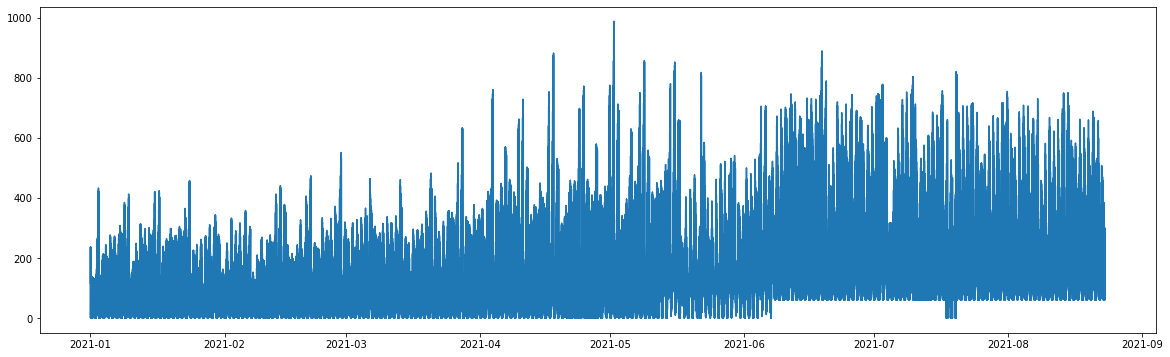

In [15]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)
plt.plot(post_covid_data['Occupied'])
plt.show()


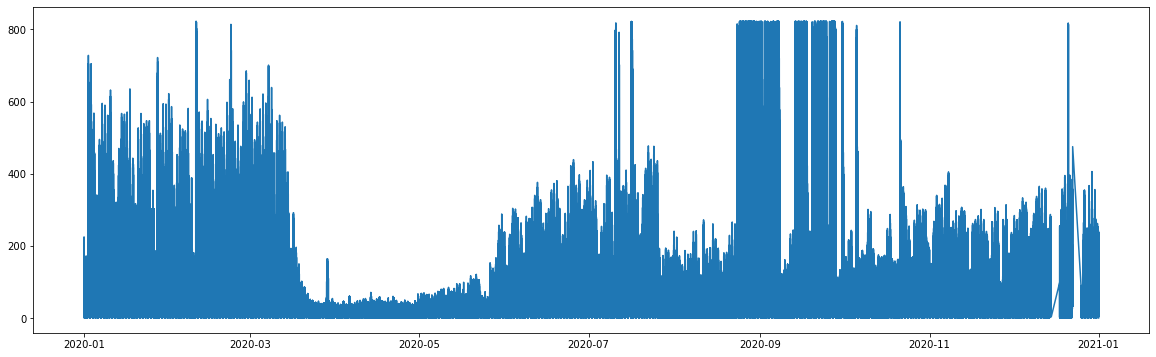

In [30]:
covid_data = data[data.index.year == 2020]
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)
plt.plot(covid_data['Occupied'])
plt.show()


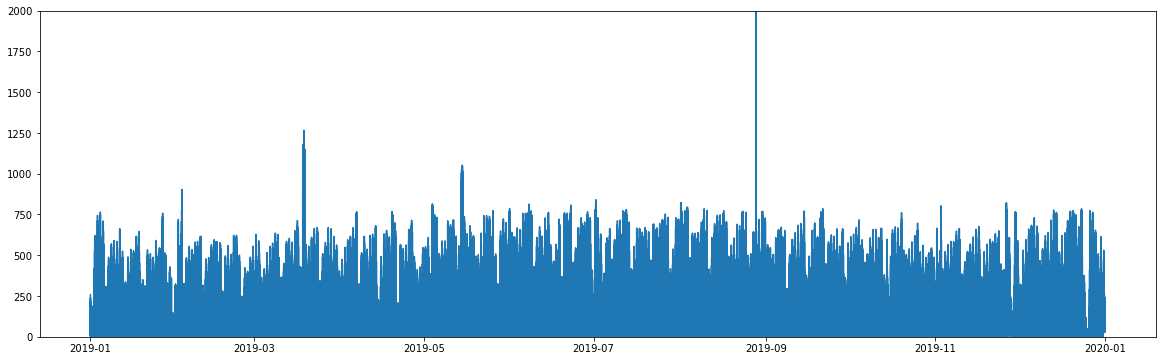

In [31]:
pre_covid_data = data[data.index.year == 2019]
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)
plt.ylim(top=2000)
plt.plot(pre_covid_data['Occupied'])
plt.show()


In [25]:
pre_covid_data['Occupied']

TimeStamp
2019-12-31 23:42:00     32
2019-12-31 23:42:00    226
2019-12-31 23:42:00     29
2019-12-31 23:42:00     67
2019-12-31 23:42:00    151
                      ... 
2019-01-01 00:12:00     15
2019-01-01 00:12:00    221
2019-01-01 00:12:00     40
2019-01-01 00:12:00     37
2019-01-01 00:12:00    258
Name: Occupied, Length: 87578, dtype: int64

In [26]:
pre_covid_data['Occupied'].mean()

124.57236977323072

In [27]:
post_covid_data['Occupied'].mean()

144.96999516050977

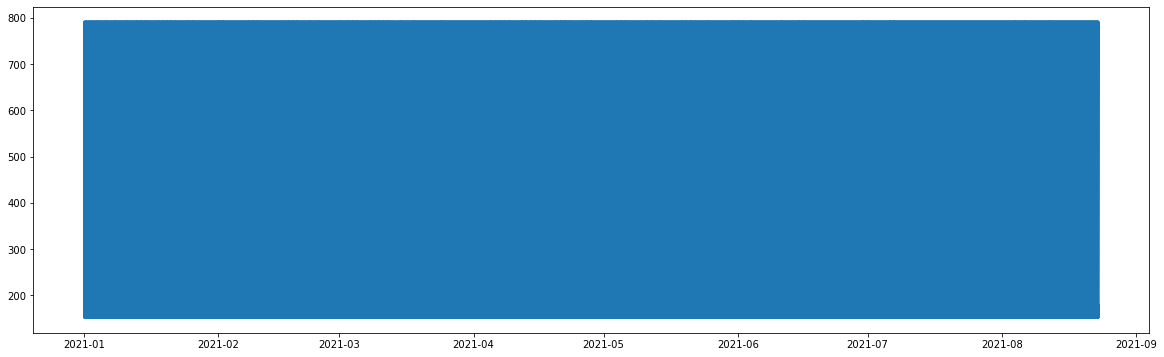

In [35]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(6)
plt.plot(post_covid_data['TotalAvailable'])
plt.show()


In [29]:
post_covid_data['TotalAvailable']

TimeStamp
2021-08-23 08:42:00    179
2021-08-23 08:42:00    166
2021-08-23 08:42:00    151
2021-08-23 08:42:00    792
2021-08-23 08:42:00    400
                      ... 
2021-01-01 00:12:00    179
2021-01-01 00:12:00    166
2021-01-01 00:12:00    151
2021-01-01 00:12:00    792
2021-01-01 00:12:00    400
Name: TotalAvailable, Length: 55791, dtype: int64

In [42]:
facilities = post_covid_data['Facility'].unique()

Central Parking Facility Upper Level


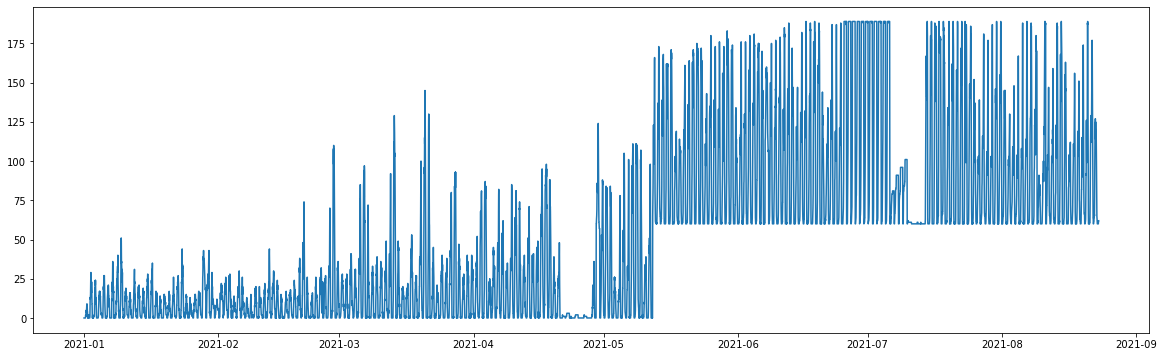

Central Parking Facility Lower Level


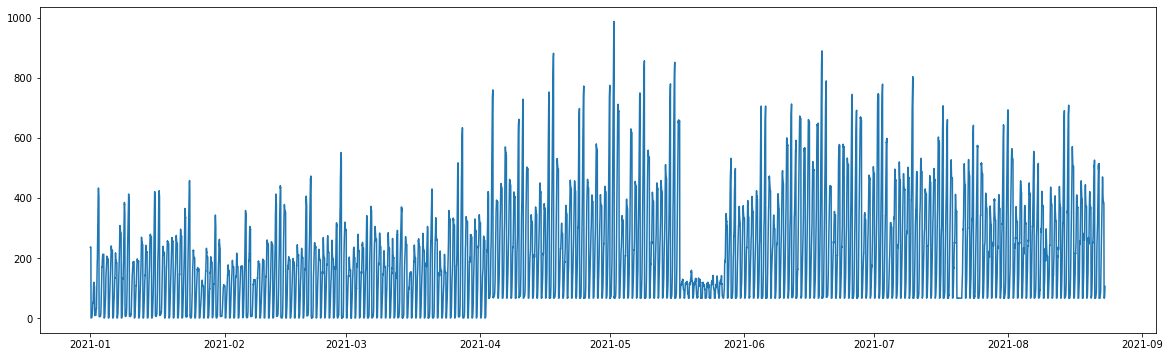

Central Parking Facility Mid Level


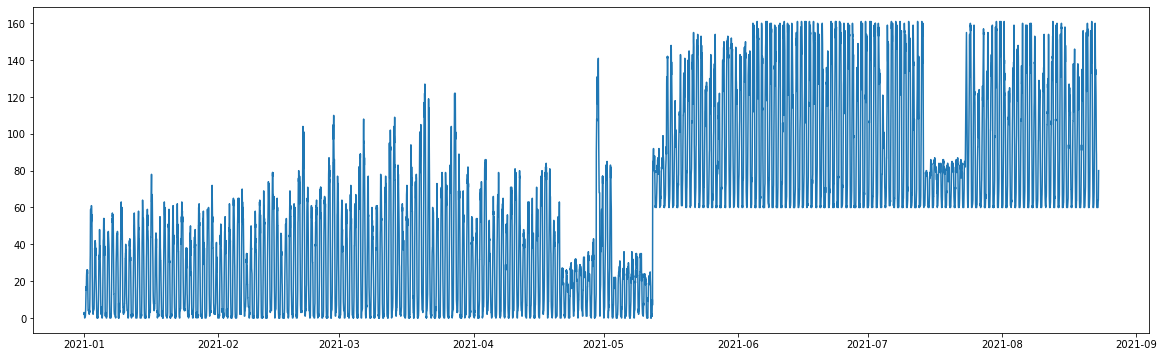

Van Buren Parking Facility


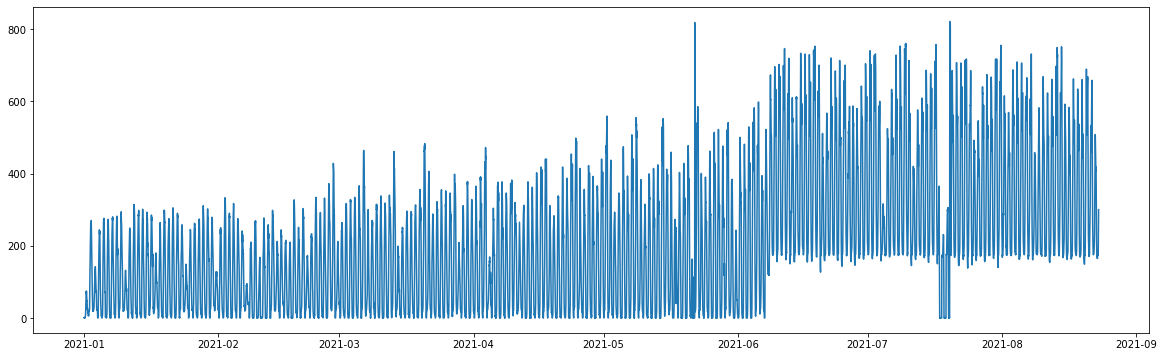

Water Street Parking Facility


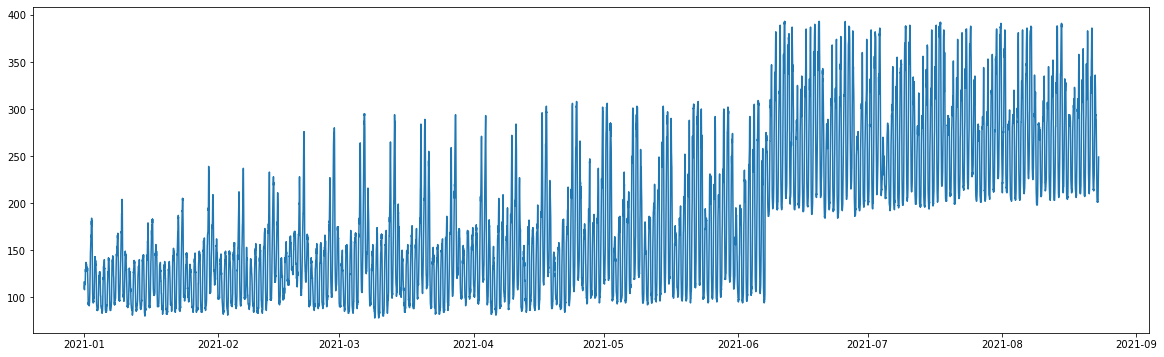

In [47]:
for facility in facilities:
    print(facility)
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(6)
    plt.plot(post_covid_data[post_covid_data['Facility']==facility]['Occupied'])
    plt.show()


In [64]:
d = post_covid_data.drop('Address',axis=1)

In [74]:
day_post_covid = d.groupby(['Facility']).resample('D').sum()


In [75]:
day_post_covid

Occupied  Vacant  \
Facility                             TimeStamp                      
Central Parking Facility Lower Level 2021-01-01      3829    4139   
                                     2021-01-02      7965       3   
                                     2021-01-03      4291    3677   
                                     2021-01-04      5584    2218   
                                     2021-01-05      6095    1873   
...                                                   ...     ...   
Water Street Parking Facility        2021-08-19     13123    6077   
                                     2021-08-20     13644    5556   
                                     2021-08-21     13851    5349   
                                     2021-08-22     12474    6726   
                                     2021-08-23      3780    3420   

                                                 TotalAvailable  day_of_week  \
Facility                             TimeStamp                                 
Central Parking Facility Lower Level 2021-01-01            7968          192   
                                     2021-01-02            7968          240   
                                     2021-01-03            7968          288   
                                     2021-01-04            7802            0   
                                     2021-01-05            7968           48   
...                                                         ...          ...   
Water Street Parking Facility        2021-08-19           19200          144   
                                     2021-08-20           19200          192   
                                     2021-08-21           19200          240   
                                     2021-08-22           19200          288   
                                     2021-08-23            7200            0   

                                                 hour  month  
Facility                             TimeStamp                
Central Parking Facility Lower Level 2021-01-01   552     48  
                                     2021-01-02   552     48  
                                     2021-01-03   552     48  
                                     2021-01-04   549     47  
                                     2021-01-05   552     48  
...                                               ...    ...  
Water Street Parking Facility        2021-08-19   552    384  
                                     2021-08-20   552    384  
                                     2021-08-21   552    384  
                                     2021-08-22   552    384  
                                     2021-08-23    72    144  

[1175 rows x 6 columns]

In [71]:
d.groupby('Facility').sum()

,Occupied,Vacant,TotalAvailable,day_of_week,hour,month
Facility,,,,,,
Central Parking Facility Lower Level,2414278,-562382,1851896,33780,128882,49127
Central Parking Facility Mid Level,654372,1029882,1684254,33777,128867,49117
Central Parking Facility Upper Level,591756,1404631,1996387,33777,128864,49113
Van Buren Parking Facility,2358241,6481271,8839512,33792,128946,49155
Water Street Parking Facility,2069374,2397426,4466800,33807,128964,49183
